# STABILITY OF SMART GRID USING ANN

### **Importing Libraries and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATA URL**

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv'

In [ ]:
df = pd.read_csv(url)

### **Data Analysis**

In [ ]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


**Relationship between data**

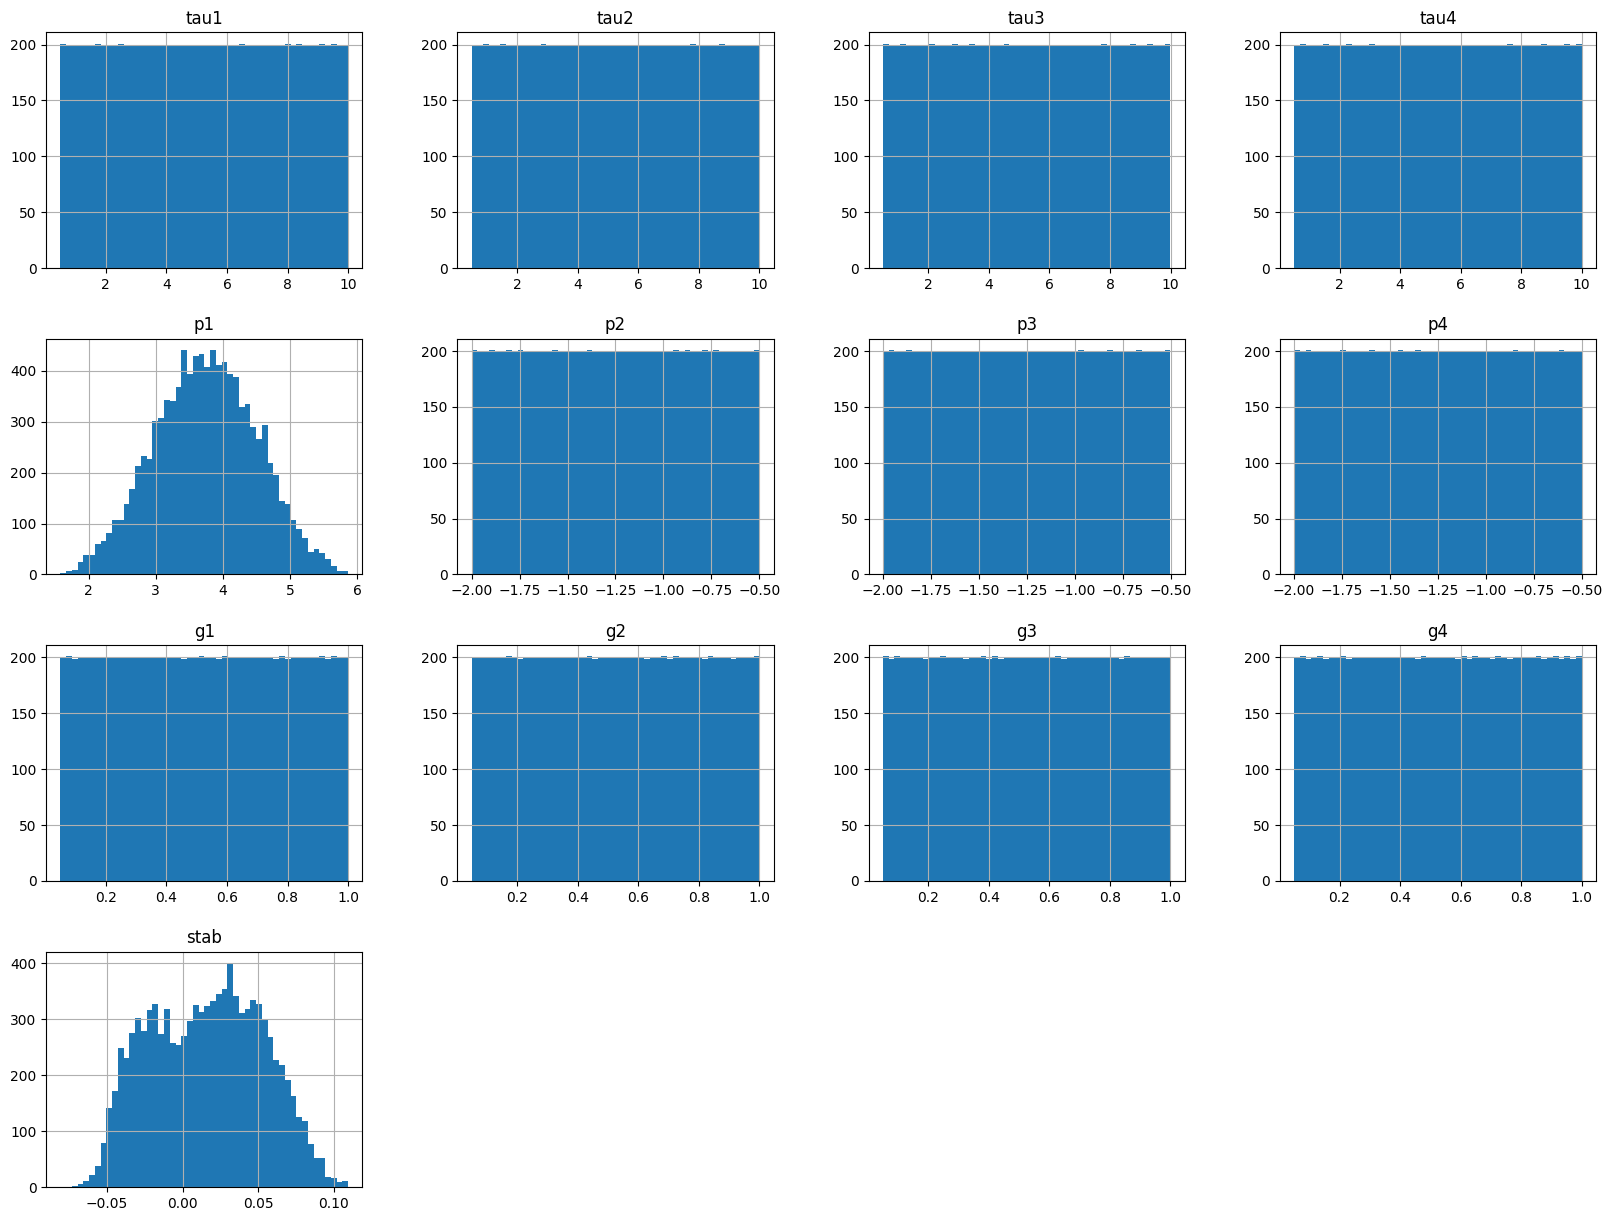

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

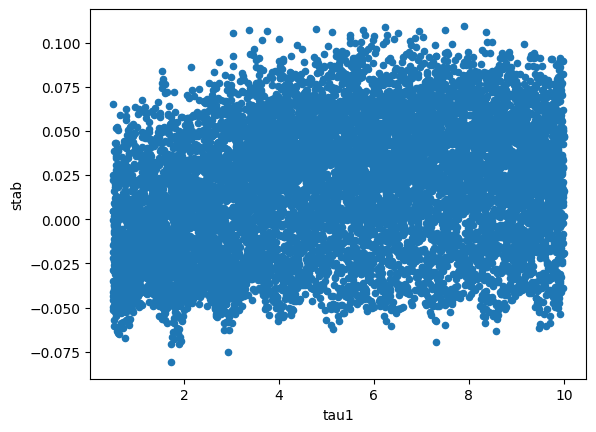

In [ ]:
df.plot(x='tau1', y='stab', kind='scatter')
plt.show()

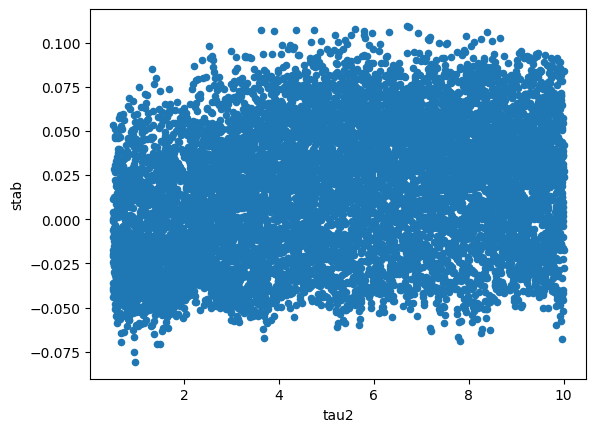

In [ ]:
df.plot(x='tau2', y='stab', kind='scatter')
plt.show()

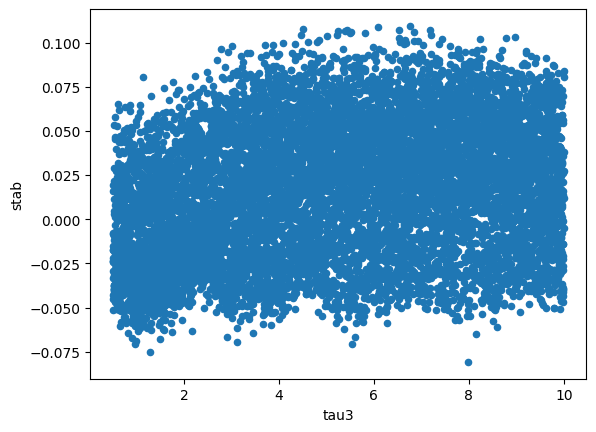

In [ ]:
df.plot(x='tau3', y='stab', kind='scatter')
plt.show()

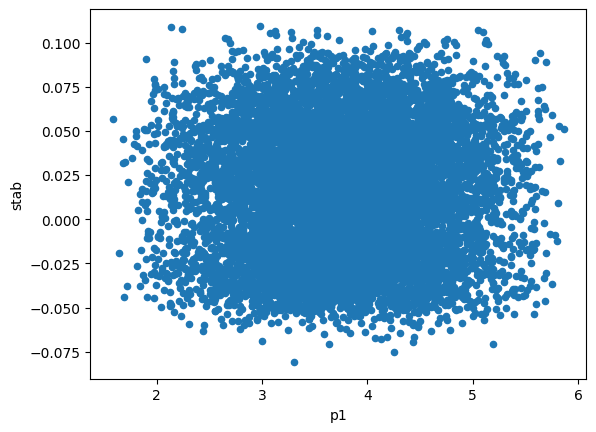

In [ ]:
df.plot(x='p1', y='stab', kind='scatter')
plt.show()

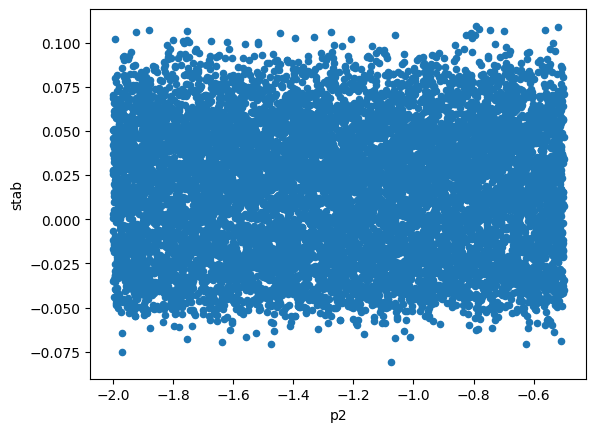

In [ ]:
df.plot(x='p2', y='stab', kind='scatter')
plt.show()

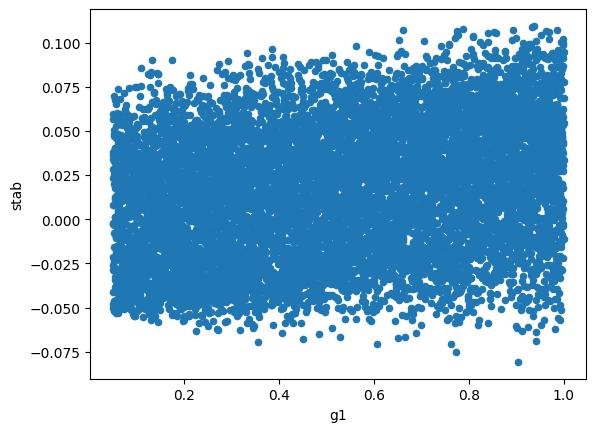

In [ ]:
df.plot(x='g1', y='stab', kind='scatter')
plt.show()

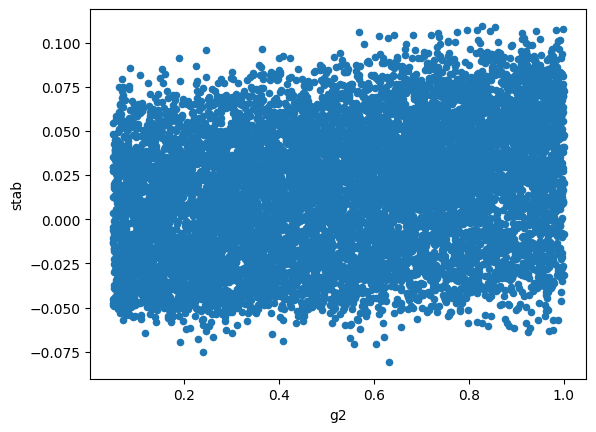

In [ ]:
df.plot(x='g2', y='stab', kind='scatter')
plt.show()

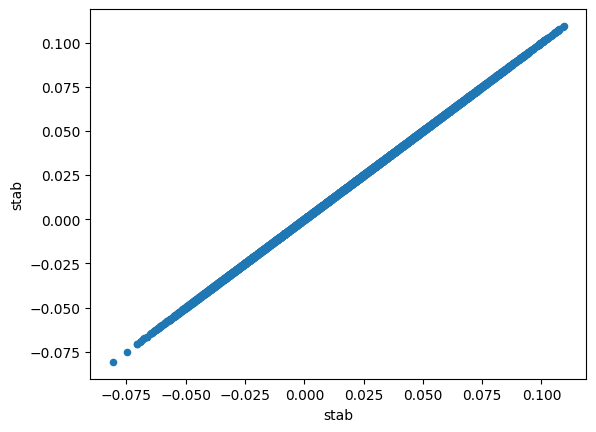

In [ ]:
df.plot(x='stab', y='stab', kind='scatter')
plt.show()

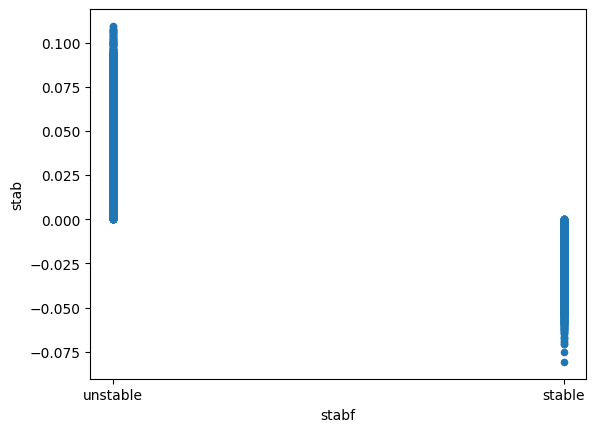

In [ ]:
df.plot(x='stabf', y='stab', kind='scatter')
plt.show()

**Correlation Map**
* It provides corelation between the different 12 input variables and the output variable (stab)

<ipython-input-15-3a7deab96195>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)


<Axes: >

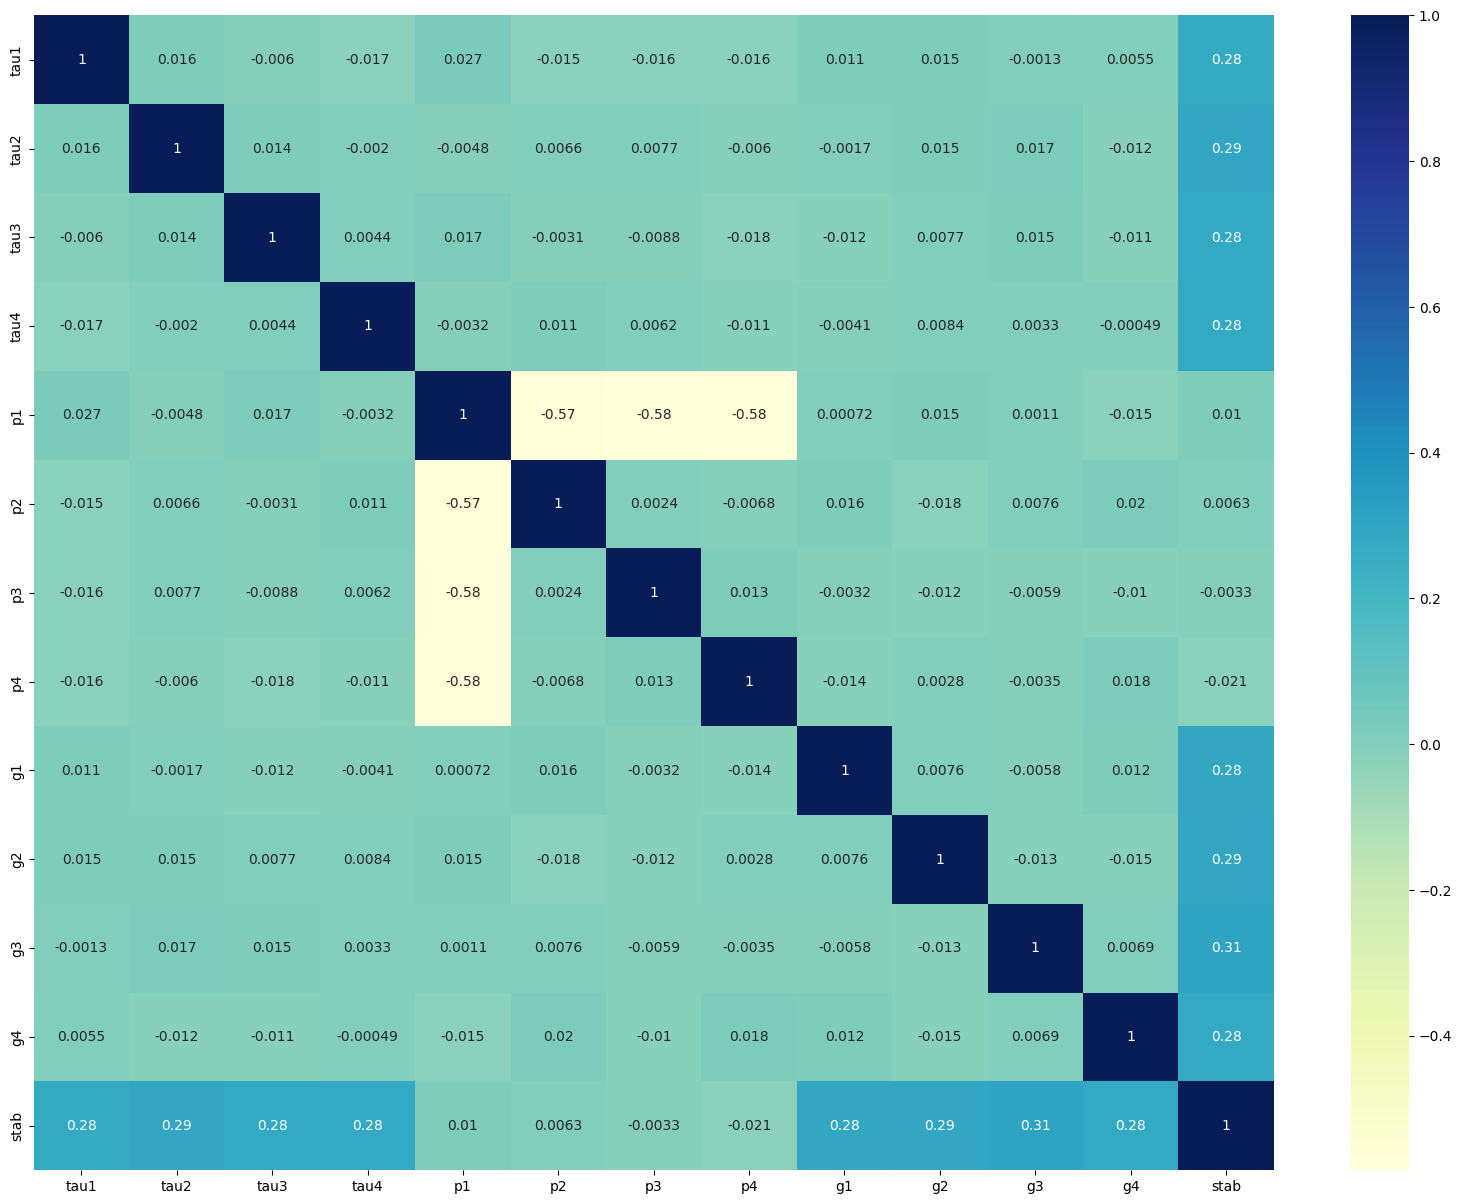

In [ ]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [ ]:
df = df.drop('stab', axis = 1)

**Dropiing *stab* Column**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

stabf_dummies = pd.get_dummies(df.stabf)
df_new = pd.concat([df, stabf_dummies], axis = 1)
df_new.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf,stable,unstable
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable,0,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable,1,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable,0,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable,0,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable,0,1


In [ ]:
df_new.drop(['stabf', 'unstable'], axis = 1, inplace = True)
df_new.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stable
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stable  10000 non-null  uint8  
dtypes: float64(12), uint8(1)
memory usage: 947.4 KB


In [ ]:
X = df_new.drop('stable', axis = 1)
Y = df_new[['stable']]
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [ ]:
Y.head()

,stable
0,0
1,1
2,0
3,0
4,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.258801,0.271561,0.829616,0.976978,0.509244,0.811642,0.495075,0.184572,0.632098,0.852229,0.881531,0.955894
1,0.926793,0.463424,0.268117,0.091471,0.813957,0.039894,0.084809,0.496642,0.382588,0.855215,0.539078,0.770323
2,0.891799,0.878795,0.268005,0.075171,0.425652,0.528367,0.481864,0.719670,0.118990,0.754440,0.831000,0.062980
3,0.022700,0.754704,0.419623,0.193715,0.556118,0.648372,0.040670,0.668412,0.417084,0.975576,0.925677,0.329181
4,0.277230,0.748301,0.467747,0.985065,0.453830,0.582991,0.102655,0.963811,0.786481,0.426782,0.638883,0.811553


#### Dividing Training and Testing Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.75)

In [ ]:
X_train.info()
print('*' * 50)

Y_train.info()
print('*' * 50)

X_test.info()
print('*' * 50)

Y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 6231 to 1775
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    7500 non-null   float64
 1   tau2    7500 non-null   float64
 2   tau3    7500 non-null   float64
 3   tau4    7500 non-null   float64
 4   p1      7500 non-null   float64
 5   p2      7500 non-null   float64
 6   p3      7500 non-null   float64
 7   p4      7500 non-null   float64
 8   g1      7500 non-null   float64
 9   g2      7500 non-null   float64
 10  g3      7500 non-null   float64
 11  g4      7500 non-null   float64
dtypes: float64(12)
memory usage: 761.7 KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 6231 to 1775
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   stable  7500 non-null   uint8
dtypes: uint8(1)
memory usage: 65.9 KB
*************************

## Applyinig Models

**Deep Learning Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [ ]:
model = keras.Sequential([
    layers.Dense(units = 420, activation = 'relu', input_shape = [12]),
    layers.Dense(units = 1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['accuracy']
)

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 15,
    restore_best_weights = True
)

history = model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    batch_size = 50,
    epochs = 200,
    callbacks = [early_stopping]
)

Epoch 1/200
150/150 [==============================] - 2s 5ms/step - loss: 0.3710 - accuracy: 0.6349 - val_loss: 0.3435 - val_accuracy: 0.6488
Epoch 2/200
150/150 [==============================] - 1s 4ms/step - loss: 0.2766 - accuracy: 0.7584 - val_loss: 0.2375 - val_accuracy: 0.8084
Epoch 3/200
150/150 [==============================] - 1s 4ms/step - loss: 0.2191 - accuracy: 0.8159 - val_loss: 0.2103 - val_accuracy: 0.8124
Epoch 4/200
150/150 [==============================] - 0s 3ms/step - loss: 0.2005 - accuracy: 0.8248 - val_loss: 0.1952 - val_accuracy: 0.8352
Epoch 5/200
150/150 [==============================] - 0s 3ms/step - loss: 0.1890 - accuracy: 0.8305 - val_loss: 0.1866 - val_accuracy: 0.8336
Epoch 6/200
150/150 [==============================] - 1s 3ms/step - loss: 0.1801 - accuracy: 0.8381 - val_loss: 0.1765 - val_accuracy: 0.8456
Epoch 7/200
150/150 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 0.8451 - val_loss: 0.1658 - val_accuracy: 0.8540

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Model Training History**

*  plot of accuracy on the training and validation datasets over training epochs
* plot of loss on the training and validation datasets over training epochs


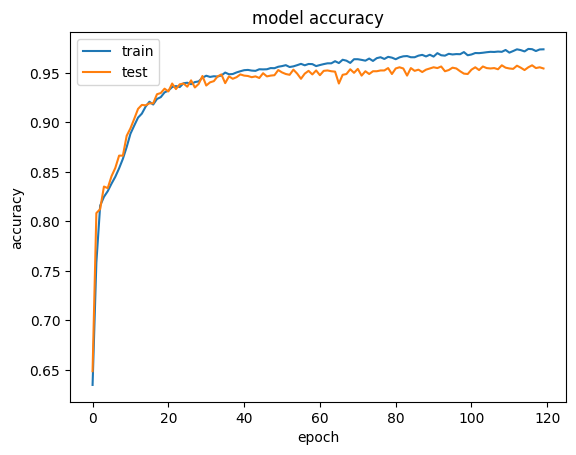

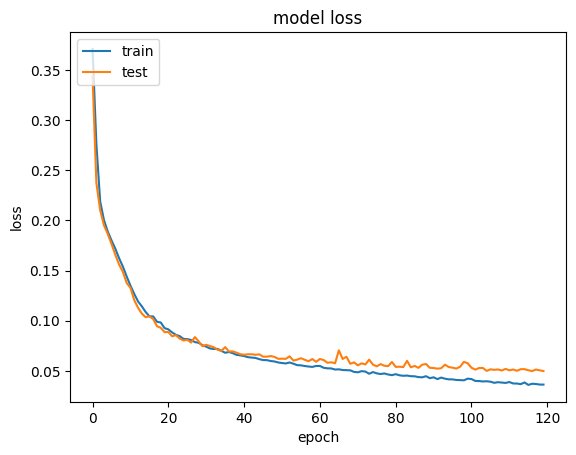

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9548


[0.0500677190721035, 0.954800009727478]

**Models Accuracy** - 96.08%

In [ ]:
model1 = keras.Sequential([
    layers.Dense(units = 420, activation = 'relu', input_shape = [12]),
    layers.Dense(units = 1, activation = 'sigmoid')
])

model1.compile(
    optimizer = 'sgd',
    loss = 'mse',
    metrics = ['accuracy']
)

history = model1.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    batch_size = 50,
    epochs = 200,
    callbacks = [early_stopping]
)

Epoch 1/200
150/150 [==============================] - 2s 6ms/step - loss: 0.2321 - accuracy: 0.6177 - val_loss: 0.2211 - val_accuracy: 0.6404
Epoch 2/200
150/150 [==============================] - 1s 5ms/step - loss: 0.2185 - accuracy: 0.6372 - val_loss: 0.2165 - val_accuracy: 0.6404
Epoch 3/200
150/150 [==============================] - 1s 4ms/step - loss: 0.2154 - accuracy: 0.6372 - val_loss: 0.2141 - val_accuracy: 0.6404
Epoch 4/200
150/150 [==============================] - 1s 4ms/step - loss: 0.2130 - accuracy: 0.6372 - val_loss: 0.2118 - val_accuracy: 0.6404
Epoch 5/200
150/150 [==============================] - 1s 4ms/step - loss: 0.2106 - accuracy: 0.6372 - val_loss: 0.2095 - val_accuracy: 0.6404
Epoch 6/200
150/150 [==============================] - 1s 4ms/step - loss: 0.2082 - accuracy: 0.6372 - val_loss: 0.2073 - val_accuracy: 0.6404
Epoch 7/200
150/150 [==============================] - 1s 4ms/step - loss: 0.2059 - accuracy: 0.6372 - val_loss: 0.2050 - val_accuracy: 0.6408

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


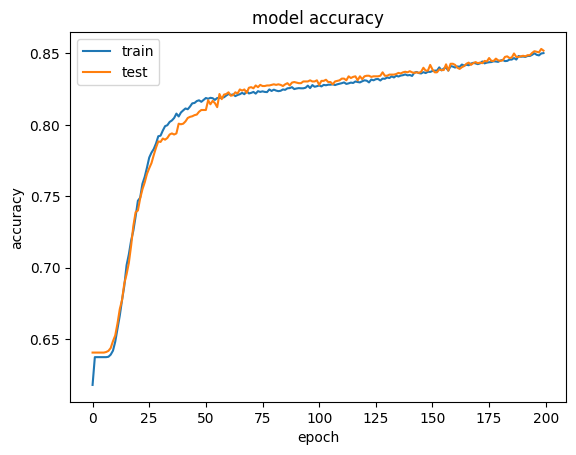

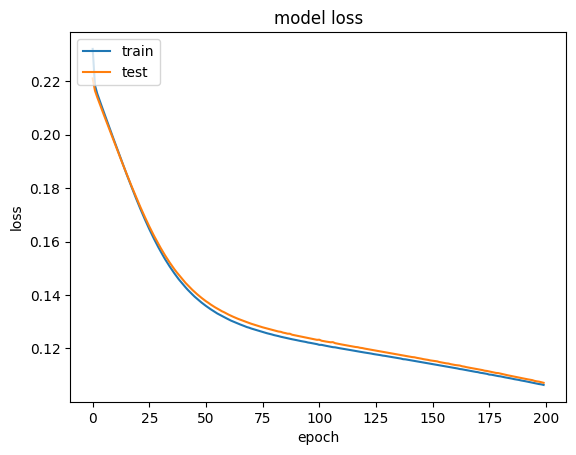

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model1.evaluate(X_test,Y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.8520


[0.1071266457438469, 0.8519999980926514]

**Models Accuracy** - 85.56%

In [ ]:
model2 = keras.Sequential([
    layers.Dense(units = 420, activation = 'relu', input_shape = [12]),
    layers.Dense(units = 1, activation = 'sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

history = model2.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    batch_size = 50,
    epochs = 200,
    callbacks = [early_stopping]
)

Epoch 1/200
150/150 [==============================] - 2s 7ms/step - loss: 0.5211 - accuracy: 0.7207 - val_loss: 0.4356 - val_accuracy: 0.8100
Epoch 2/200
150/150 [==============================] - 1s 4ms/step - loss: 0.3936 - accuracy: 0.8219 - val_loss: 0.3655 - val_accuracy: 0.8380
Epoch 3/200
150/150 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.8411 - val_loss: 0.3334 - val_accuracy: 0.8520
Epoch 4/200
150/150 [==============================] - 1s 4ms/step - loss: 0.3151 - accuracy: 0.8604 - val_loss: 0.3021 - val_accuracy: 0.8668
Epoch 5/200
150/150 [==============================] - 1s 4ms/step - loss: 0.2857 - accuracy: 0.8781 - val_loss: 0.2669 - val_accuracy: 0.8840
Epoch 6/200
150/150 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.8919 - val_loss: 0.2407 - val_accuracy: 0.8984
Epoch 7/200
150/150 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.9027 - val_loss: 0.2216 - val_accuracy: 0.9164

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


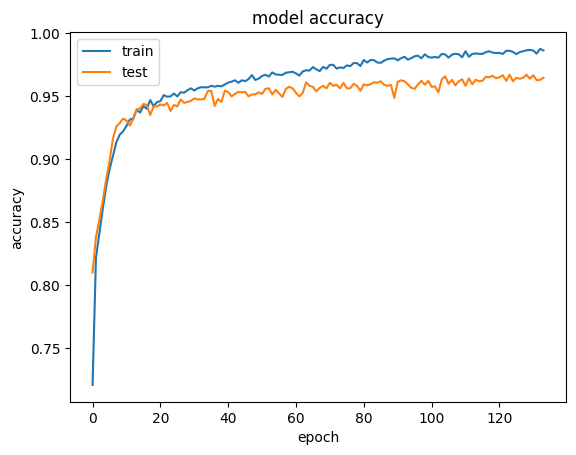

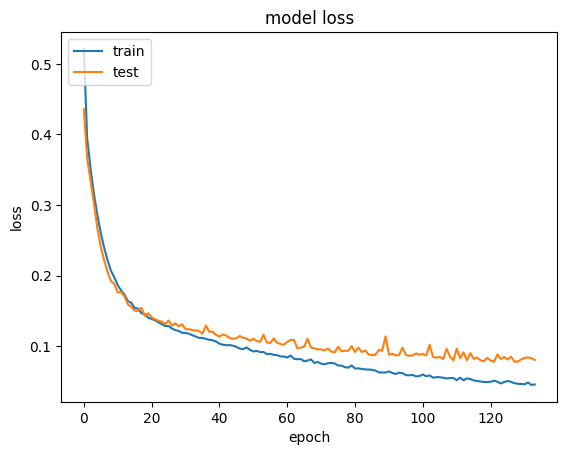

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model2.evaluate(X_test,Y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9664


[0.07869283854961395, 0.9664000272750854]

**Models Accuracy** - 96.64%

In [ ]:
model3 = keras.Sequential([
    layers.Dense(units = 420, activation = 'relu', input_shape = [12]),
    layers.Dense(units = 1, activation = 'sigmoid')
])

model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model3.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    batch_size = 50,
    epochs = 200,
    callbacks = [early_stopping]
)

Epoch 1/200
150/150 [==============================] - 1s 5ms/step - loss: 0.5403 - binary_accuracy: 0.7071 - val_loss: 0.4401 - val_binary_accuracy: 0.7968
Epoch 2/200
150/150 [==============================] - 1s 4ms/step - loss: 0.3923 - binary_accuracy: 0.8243 - val_loss: 0.3687 - val_binary_accuracy: 0.8272
Epoch 3/200
150/150 [==============================] - 1s 4ms/step - loss: 0.3426 - binary_accuracy: 0.8439 - val_loss: 0.3204 - val_binary_accuracy: 0.8596
Epoch 4/200
150/150 [==============================] - 0s 3ms/step - loss: 0.3056 - binary_accuracy: 0.8667 - val_loss: 0.2830 - val_binary_accuracy: 0.8816
Epoch 5/200
150/150 [==============================] - 0s 3ms/step - loss: 0.2751 - binary_accuracy: 0.8841 - val_loss: 0.2570 - val_binary_accuracy: 0.8928
Epoch 6/200
150/150 [==============================] - 0s 3ms/step - loss: 0.2482 - binary_accuracy: 0.8984 - val_loss: 0.2309 - val_binary_accuracy: 0.9060
Epoch 7/200
150/150 [==============================] - 1s 

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


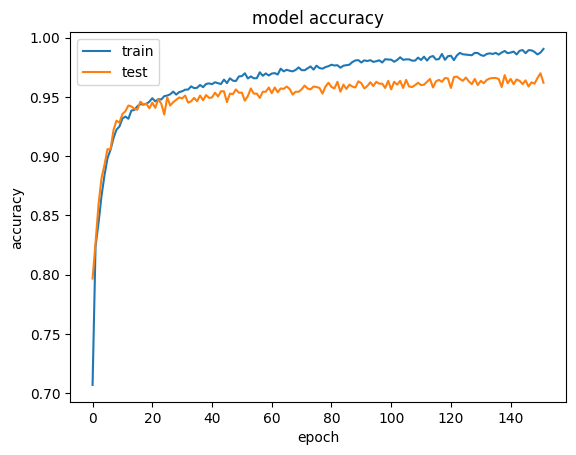

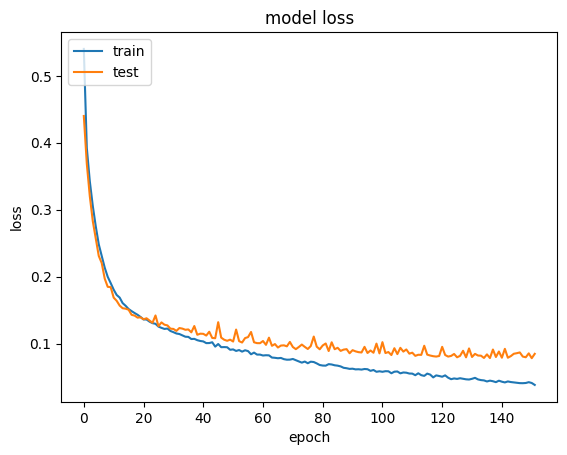

In [ ]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model3.evaluate(X_test,Y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.0783 - binary_accuracy: 0.9652


[0.07826228439807892, 0.9652000069618225]

**Models Accuracy** - 96.04%

In [ ]:
np.random.seed(69)

model4 = keras.Sequential([
    layers.Dense(units = 420, activation = 'relu', input_shape = [12]),
    layers.Dense(units = 420, activation = 'relu'),
    layers.Dense(units = 420, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(units = 1, activation = 'sigmoid')
])

model4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model4.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    batch_size = 50,
    epochs = 200,
    callbacks = [early_stopping]
)

Epoch 1/200
150/150 [==============================] - 3s 16ms/step - loss: 0.3543 - binary_accuracy: 0.8315 - val_loss: 0.2336 - val_binary_accuracy: 0.8956
Epoch 2/200
150/150 [==============================] - 3s 21ms/step - loss: 0.1992 - binary_accuracy: 0.9128 - val_loss: 0.1582 - val_binary_accuracy: 0.9340
Epoch 3/200
150/150 [==============================] - 2s 15ms/step - loss: 0.1675 - binary_accuracy: 0.9309 - val_loss: 0.1618 - val_binary_accuracy: 0.9304
Epoch 4/200
150/150 [==============================] - 2s 15ms/step - loss: 0.1506 - binary_accuracy: 0.9355 - val_loss: 0.1524 - val_binary_accuracy: 0.9332
Epoch 5/200
150/150 [==============================] - 2s 12ms/step - loss: 0.1467 - binary_accuracy: 0.9359 - val_loss: 0.1382 - val_binary_accuracy: 0.9412
Epoch 6/200
150/150 [==============================] - 2s 14ms/step - loss: 0.1066 - binary_accuracy: 0.9561 - val_loss: 0.1058 - val_binary_accuracy: 0.9544
Epoch 7/200
150/150 [==============================]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


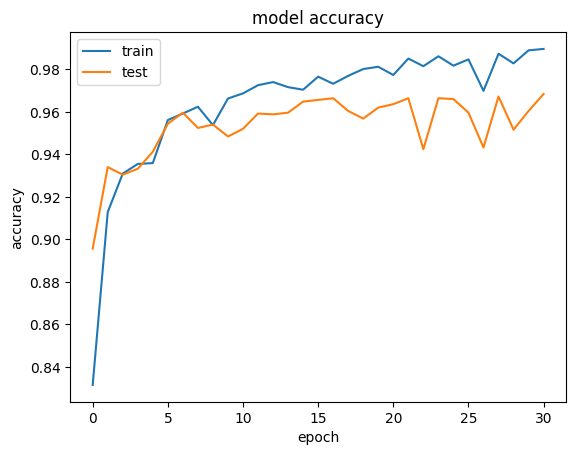

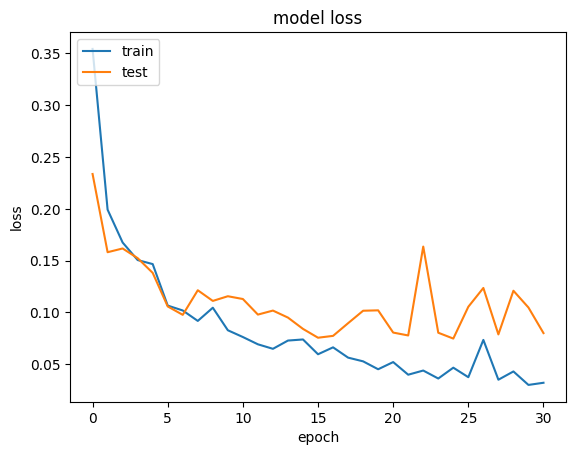

In [ ]:
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model4.evaluate(X_test,Y_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.0757 - binary_accuracy: 0.9656


[0.0756552442908287, 0.9656000137329102]

**Models Accuracy** - 96.76%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 420, criterion = 'entropy', oob_score = True)

In [ ]:
rf.fit(X_train, Y_train)

<ipython-input-47-d0055dbae671>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=420, oob_score=True)

In [ ]:
rf.score(X_test, Y_test)

0.9264

In [ ]:
Y_pred = rf.predict(X_test)
Y_pred = pd.DataFrame({
    'stab': Y_pred
})
Y_pred.head()

,stab
0,0
1,0
2,1
3,0
4,0


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cf = confusion_matrix(Y_test, Y_pred)
print(cf)

score = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')

[[1535   66]
 [ 118  781]]
Accuracy: 92.64%


**Models Accuracy** - 92.92%

### comparing Accuracy of All Models

* **Model** - 96.08%
* **Model** - 85.56%
* **Model** - 96.64%
* **Model** - 96.04%
* **Model** - 96.76%
* **Model** - 92.92%